In [1]:
pwd

'C:\\Users\\Admin\\Desktop\\ImageProcess'

In [6]:
import tensorflow as tf


In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
pip list

Package                            Version            
---------------------------------- -------------------
absl-py                            0.9.0              
alabaster                          0.7.12             
anaconda-client                    1.7.2              
anaconda-navigator                 1.9.7              
anaconda-project                   0.8.3              
asn1crypto                         1.2.0              
astor                              0.8.1              
astroid                            2.3.3              
astropy                            4.0                
atomicwrites                       1.3.0              
attrs                              19.3.0             
Babel                              2.8.0              
backcall                           0.1.0              
backports.functools-lru-cache      1.6.1              
backports.os                       0.1.1              
backports.shutil-get-terminal-size 1.0.0              
backports.

In [14]:
%matplotlib inline
from IPython.display import display,Math,Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img=Image.open('dataset/low6.jpg')

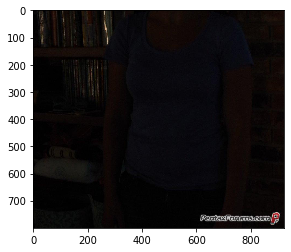

In [15]:
plt.imshow(img,cmap='gray')

In [16]:
#converting my image into numpy array

img=np.asarray(img)

(array([6.18840e+05, 7.70374e+05, 4.79360e+05, 1.76217e+05, 8.69520e+04,
        3.39520e+04, 1.14990e+04, 4.91200e+03, 4.62000e+03, 3.33900e+03,
        2.41700e+03, 1.81400e+03, 2.32400e+03, 2.28300e+03, 1.65200e+03,
        8.39000e+02, 7.41000e+02, 5.60000e+02, 4.83000e+02, 3.94000e+02,
        4.13000e+02, 4.25000e+02, 4.65000e+02, 3.51000e+02, 3.67000e+02,
        3.85000e+02, 3.12000e+02, 4.10000e+02, 4.46000e+02, 5.84000e+02,
        4.03000e+02, 5.15000e+02, 4.64000e+02, 5.88000e+02, 4.11000e+02,
        5.83000e+02, 5.97000e+02, 5.92000e+02, 5.00000e+02, 7.48000e+02,
        9.07000e+02, 6.00000e+02, 2.57000e+02, 1.54000e+02, 7.40000e+01,
        2.90000e+01, 1.80000e+01, 2.00000e+01, 6.00000e+00, 4.00000e+00]),
 array([  0.  ,   4.74,   9.48,  14.22,  18.96,  23.7 ,  28.44,  33.18,
         37.92,  42.66,  47.4 ,  52.14,  56.88,  61.62,  66.36,  71.1 ,
         75.84,  80.58,  85.32,  90.06,  94.8 ,  99.54, 104.28, 109.02,
        113.76, 118.5 , 123.24, 127.98, 132.72, 137.

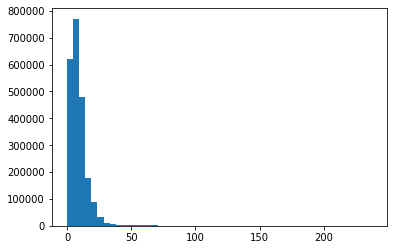

In [17]:
#flattening image pixels
flat=img.flatten()

#showing histogram
plt.hist(flat,bins =50)

In [18]:
#histogram equalisation function

display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

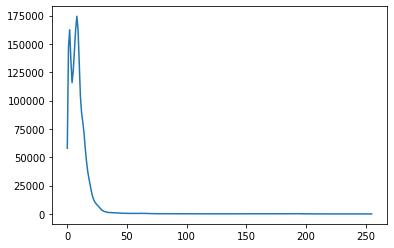

In [19]:
def get_histogram(image,bins):
    histogram = np.zeros(bins)
    for pixel in image:
        histogram[pixel]+=1
    return histogram
hist = get_histogram(flat,256)
plt.plot(hist)

<IPython.core.display.Math object>

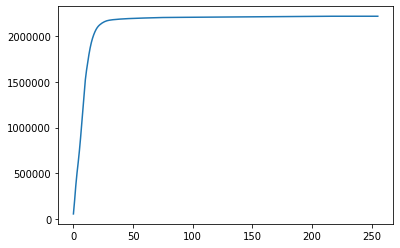

In [20]:
def cumsum(a):
    a=iter(a)
    b=[next(a)]
    for i in a:
        b.append(b[-1]+i)
    return np.array(b)

cs = cumsum(hist)
plt.plot(cs)

display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

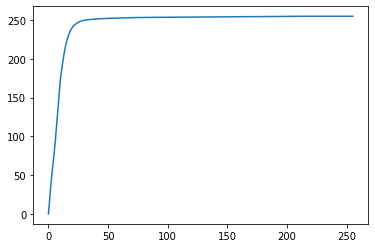

In [21]:
#normalizing between 0-255

nj=(cs-cs.min())*255
N=cs.max()-cs.min()

cs = nj/N
plt.plot(cs)

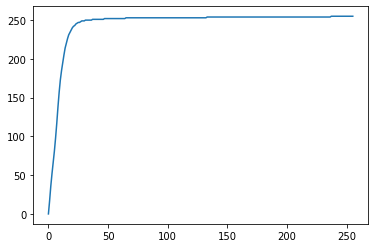

In [22]:
cs=cs.astype('uint8')
plt.plot(cs)

(array([ 57934.,      0.,      0., 146919.,      0.,      0.,      0.,
        162483.,      0.,      0., 135707.,      0., 115797.,      0.,
             0., 126763.,      0.,      0.,      0., 143761.,      0.,
             0., 162264.,      0.,      0.,      0.,      0., 174400.,
             0.,      0., 163186.,      0.,      0., 134428.,      0.,
             0., 103527.,      0.,  88789.,      0.,  81073.,  71543.,
             0.,  58495.,  47317.,  70405.,  26495.,  49829.,  50515.,
         43570.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

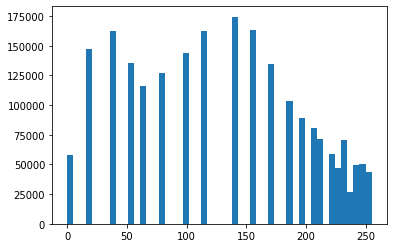

In [23]:
img_new = cs[flat]
plt.hist(img_new,bins=50)

In [24]:
img_new = np.reshape(img_new,img.shape)
img_new

array([[[117,  81,  98],
        [117,  81,  98],
        [117,  81,  98],
        ...,
        [248, 195, 157],
        [248, 195, 157],
        [248, 195, 157]],

       [[138,  98, 117],
        [117,  81,  98],
        [117,  81,  98],
        ...,
        [247, 185, 138],
        [247, 185, 138],
        [247, 185, 138]],

       [[138,  98, 117],
        [138,  98, 117],
        [117,  81,  98],
        ...,
        [247, 185, 138],
        [247, 185, 138],
        [247, 185, 138]],

       ...,

       [[ 17,  17,  17],
        [ 36,  36,  36],
        [ 36,  36,  36],
        ...,
        [173,  98,  81],
        [173,  98,  81],
        [173,  98,  81]],

       [[ 17,  17,  17],
        [ 36,  36,  36],
        [ 52,  52,  52],
        ...,
        [157,  81,  66],
        [157,  81,  66],
        [157,  81,  66]],

       [[ 36,  36,  36],
        [ 52,  52,  52],
        [ 52,  52,  52],
        ...,
        [157,  81,  66],
        [157,  81,  66],
        [157,  81,  66]]

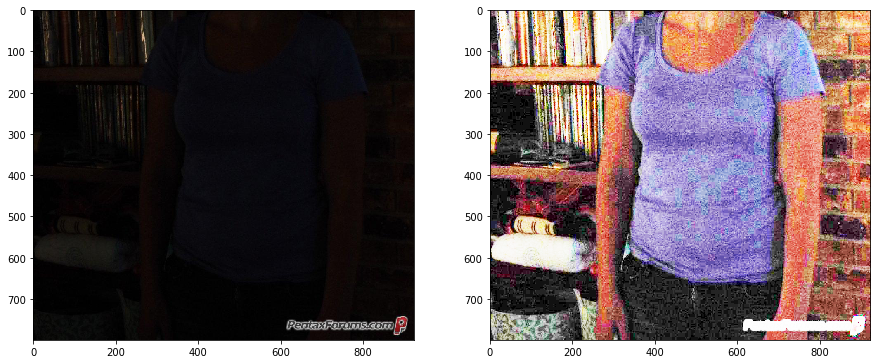

In [25]:
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')

#new image display

fig.add_subplot(1,2,2)
plt.imshow(img_new,cmap='gray')

plt.show(block=True)

In [26]:
newimg= Image.fromarray(img_new,'RGB')
newimg.save('dataset/low6enhanced.jpg')
newimg.show()